### Arbitrary value Imputation(Random Value)


- Replace all the missing values with single values.

- Main goal is to differentiate between missing and remaining values.

- For numerical values , we can use any arbitrary values such as 0,-1,99.999 which is not available in dataset .

- For categorial values , we can use keyword 'Missing' word .


### When to Use

- If data is not missing at random.


Advantages
- Easy to apply

Disadvantages
- Distribution gets affected
- Variance gets changed
- Co-variance and co-rrelation gets changed



### End of Distribution Imputation

- Another approach for abritrary values , here also we replace the values by instead we calculate the values .

- For normal distribution -  mean+3s.d , mean-3s.d

- For skewed data - 
            IQR = Q3 - Q1 , 
            upper bound = Q3 + 1.5 IQR 
            lower bound = Q1 - 1.5 IQR




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("D:/Sandesh/100-days-of-machine-learning/day36-imputing-numerical-data/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
X=df.drop(columns=['Survived'])
y=df[['Survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


### After Imputing , check the below things.

1. Variance
2. Distribution 
3. Correlation , Covariance
4. Draw Boxplot 

In [7]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus_1']=X_train['Age'].fillna(-1)

X_train['Fare_999']=X_train['Fare'].fillna(999)
X_train['Fare_minus_1']=X_train['Fare'].fillna(-1)


In [8]:
print("Before variance for age ",X_train['Age'].var())
print("After variance",X_train['Age_99'].var())
print("After variance",X_train['Age_minus_1'].var())


print("\nBefore variance for fare ",X_train['Fare'].var())
print("After variance",X_train['Fare_999'].var())
print("After variance",X_train['Fare_minus_1'].var())

# Before variance and after variance the values should not change too much.
# If there is too much change then it is a red flag.

Before variance for age  204.3495133904614
After variance 951.7275570187172
After variance 318.0896202624484

Before variance for fare  2448.197913706318
After variance 47219.20265217623
After variance 2378.5676784883503


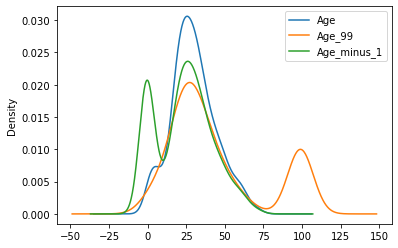

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde')

X_train['Age_99'].plot(kind='kde')

X_train['Age_minus_1'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

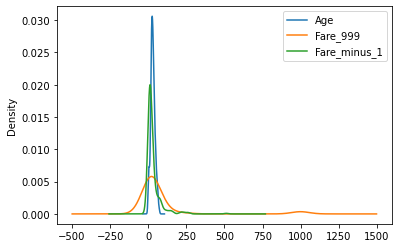

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde')

X_train['Fare_999'].plot(kind='kde')

X_train['Fare_minus_1'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [12]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
],remainder= 'passthrough')


trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [14]:

# value of imputer1 and imputer 2

trf.named_transformers_['imputer1'].statistics_

array([99.])

In [15]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [13]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

### THE END 